In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

In [29]:
bank=pd.read_excel("Thera Bank_Personal_Loan_Modelling-dataset-1.xlsx", sheet_name='Bank_Personal_Loan_Modelling')

In [ ]:
#############################Exploratory Data Analysis##################################

In [31]:
bank.head(5)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [32]:
data=bank.copy()
data.describe()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4982.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.39723,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.14716,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                       5000 non-null int64
Age (in years)           5000 non-null int64
Experience (in years)    5000 non-null int64
Income (in K/month)      5000 non-null int64
ZIP Code                 5000 non-null int64
Family members           4982 non-null float64
CCAvg                    5000 non-null float64
Education                5000 non-null int64
Mortgage                 5000 non-null int64
Personal Loan            5000 non-null int64
Securities Account       5000 non-null int64
CD Account               5000 non-null int64
Online                   5000 non-null int64
CreditCard               5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [34]:
data['Experience (in years)'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [35]:
data['Experience (in years)'].replace(-1,1,inplace=True)
data['Experience (in years)'].replace(-2,2,inplace=True)
data['Experience (in years)'].replace(-3,3,inplace=True)

In [36]:
data.apply(lambda x: len(x.unique()))

ID                       5000
Age (in years)             45
Experience (in years)      44
Income (in K/month)       162
ZIP Code                  467
Family members              5
CCAvg                     108
Education                   3
Mortgage                  347
Personal Loan               2
Securities Account          2
CD Account                  2
Online                      2
CreditCard                  2
dtype: int64

In [45]:
data1 = data.rename({'Age (in years)': 'Age', 'Experience (in years)': 'Experience' ,'Income (in K/month)': 'Income'}, axis=1)

In [46]:
data1.head(5)

,ID,Age,Experience,Income,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [47]:
data1.isnull().sum()

ID                     0
Age                    0
Experience             0
Income                 0
ZIP Code               0
Family members        18
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [49]:
data1['Family members'].unique()

array([ 4.,  3.,  1.,  2., nan])

In [52]:
data1['Family members'] = data1['Family members'].replace(np.nan, 0)
data1['Family members'].unique()


array([4., 3., 1., 2., 0.])

In [53]:
data1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family members        0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [56]:
data.describe()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4982.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.39723,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.14716,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [54]:
data1.drop('ID', axis=1, inplace=True)
data1.drop('ZIP Code', axis=1, inplace=True)

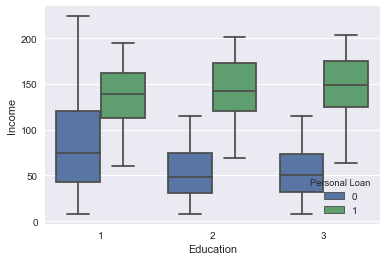

In [55]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data1)

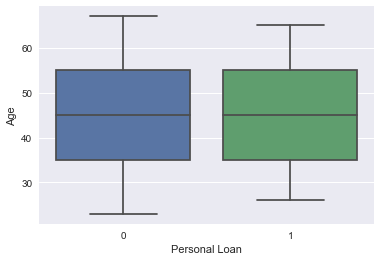

In [57]:
sns.boxplot(x='Personal Loan',y='Age',data=data1)

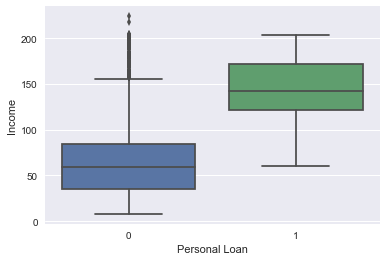

In [59]:
sns.boxplot(x='Personal Loan',y='Income',data=data1)

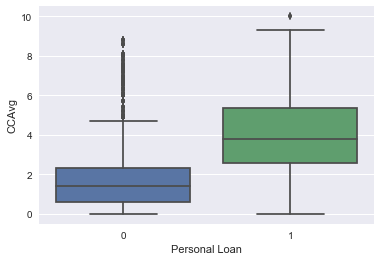

In [60]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=data1)

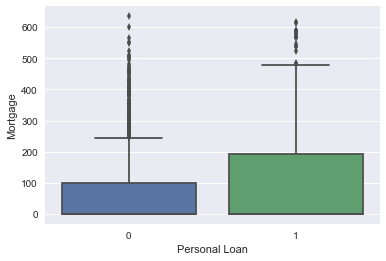

In [61]:
sns.boxplot(x='Personal Loan',y='Mortgage',data=data1)

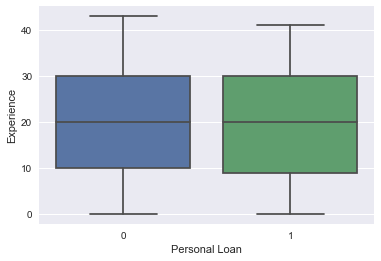

In [62]:
sns.boxplot(x='Personal Loan',y='Experience',data=data1)

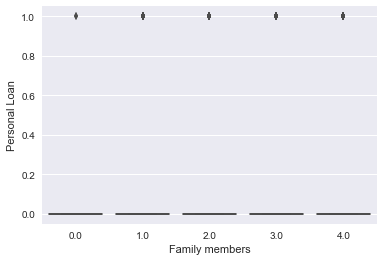

In [73]:
sns.boxplot(x='Family members',y='Personal Loan',data=data1)

In [64]:
x=data1.drop(['Personal Loan'], axis=1)
y=data1['Personal Loan']

In [65]:
sc=StandardScaler()
x_num=x[['Age','Experience','Income','Mortgage','CCAvg']]

In [66]:
x_num=pd.DataFrame(sc.fit_transform(x_num),columns=x_num.columns)
x_num.head(15)

,Age,Experience,Income,Mortgage,CCAvg
0,-1.774417,-1.676408,-0.538229,-0.555524,-0.193385
1,-0.029524,-0.099404,-0.864109,-0.555524,-0.250611
2,-0.552992,-0.449849,-1.363793,-0.555524,-0.536736
3,-0.901970,-0.975517,0.569765,-0.555524,0.436091
4,-0.901970,-1.063129,-0.625130,-0.555524,-0.536736
5,-0.727481,-0.625072,-0.972736,0.968512,-0.880087
6,0.668434,0.601487,-0.038545,-0.555524,-0.250611
7,0.406700,0.338653,-1.124814,-0.555524,-0.937312
8,-0.901970,-0.887906,0.156983,0.467055,-0.765637
9,-0.989215,-0.975517,2.307795,-0.555524,3.984049


In [67]:
x.drop(['Age','Experience','Income','Mortgage','CCAvg'],axis=1,inplace=True)
x.head()

,Family members,Education,Securities Account,CD Account,Online,CreditCard
0,4.0,1,1,0,0,0
1,3.0,1,1,0,0,0
2,1.0,1,0,0,0,0
3,1.0,2,0,0,0,0
4,4.0,2,0,0,0,1


In [70]:
Newdata=pd.concat([x_num,x],axis=1)

In [71]:
Newdata.head(5)

,Age,Experience,Income,Mortgage,CCAvg,Family members,Education,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.676408,-0.538229,-0.555524,-0.193385,4.0,1,1,0,0,0
1,-0.029524,-0.099404,-0.864109,-0.555524,-0.250611,3.0,1,1,0,0,0
2,-0.552992,-0.449849,-1.363793,-0.555524,-0.536736,1.0,1,0,0,0,0
3,-0.901970,-0.975517,0.569765,-0.555524,0.436091,1.0,2,0,0,0,0
4,-0.901970,-1.063129,-0.625130,-0.555524,-0.536736,4.0,2,0,0,0,1


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [83]:
#############################LOGISTICS REGRESSION#############################################

In [94]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1121
          1       0.65      0.13      0.22       129

avg / total       0.88      0.90      0.87      1250

0.9032
[[1112    9]
 [ 112   17]]


In [89]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test,y_pred))

0.19135809069620724


In [110]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('F1 Score:',metrics.f1_score(y_test,y_pred,average='weighted'))
print('Kappa Score:',metrics.cohen_kappa_score(y_test,y_pred))
f1_lr=metrics.f1_score(y_test,y_pred,average='weighted')
kappa_lr=metrics.cohen_kappa_score(y_test,y_pred)
Acc_lr=metrics.accuracy_score(y_test,y_pred)

Accuracy: 0.9032
F1 Score: 0.8731633042162459
Kappa Score: 0.19135809069620724


In [97]:
prob=model.predict_proba(x_test)
fpr1,tpr1, threshold1=roc_curve(y_test, prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the ROC curve: %f" % roc_auc1)

Area under the ROC curve: 0.762449


In [98]:
#############################Random Forest############################

In [99]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
y_pred1=model1.predict(x_test)

In [101]:
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1121
          1       0.65      0.19      0.29       129

avg / total       0.89      0.91      0.88      1250

0.9056
[[1108   13]
 [ 105   24]]


In [102]:
prob1=model1.predict_proba(x_test)
fpr2,tpr2, threshold2=roc_curve(y_test, prob1[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve: %f" % roc_auc2)

Area under the ROC curve: 0.758182


In [112]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred1))
print('F1 Score:',metrics.f1_score(y_test,y_pred1,average='weighted'))
print('Kappa Score:',metrics.cohen_kappa_score(y_test,y_pred1))
f1_RG=metrics.f1_score(y_test,y_pred1,average='weighted')
kappa_RG=metrics.cohen_kappa_score(y_test,y_pred1)
Acc_RG=metrics.accuracy_score(y_test,y_pred1)

Accuracy: 0.9056
F1 Score: 0.8813014608562786
Kappa Score: 0.25487739575861057


In [104]:
############################Gradient Descent Algorithm#############################

In [105]:
lr_list=[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    model2=GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    model2.fit(x_train, y_train)

In [106]:
y_pred2=model2.predict(x_test)

In [107]:
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      1121
          1       0.36      0.03      0.06       129

avg / total       0.84      0.89      0.85      1250

0.8944
[[1114    7]
 [ 125    4]]


In [111]:
prob2=model2.predict_proba(x_test)
fpr3,tpr3, threshold3=roc_curve(y_test, prob2[:,1])
roc_auc3=auc(fpr3,tpr3)
print("Area under the ROC curve: %f" % roc_auc3)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred2))
print('F1 Score:',metrics.f1_score(y_test,y_pred2,average='weighted'))
print('Kappa Score:',metrics.cohen_kappa_score(y_test, y_pred2))
f1_GBM=metrics.f1_score(y_test,y_pred2,average='weighted')
kappa_GBM=metrics.cohen_kappa_score(y_test, y_pred2)
Acc_GBM=metrics.accuracy_score(y_test,y_pred2)

Area under the ROC curve: 0.560515
Accuracy: 0.8944
F1 Score: 0.8525371428571429
Kappa Score: 0.041600353155748726


In [118]:
z1=pd.DataFrame({'Model':['Logistic Regression'],'F1_Score':f1_lr,'Kappa_Score':kappa_lr,'Accuracy':Acc_lr,'AUC':roc_auc1})
z2=pd.DataFrame({'Model':['RF'],'F1_Score':f1_RG,'Kappa_Score':kappa_RG,'Accuracy':Acc_RG,'AUC':roc_auc2})
z3=pd.DataFrame({'Model':['GBM'],'F1_Score':f1_GBM,'Kappa_Score':kappa_GBM,'Accuracy':Acc_GBM,'AUC':roc_auc3})
z=pd.concat([z1,z2,z3])

In [ ]:
###########################Model Comparison#############################################

In [119]:
z

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,Logistic Regression,0.873163,0.191358,0.9032,0.762449
0,RF,0.881301,0.254877,0.9056,0.758182
0,GBM,0.852537,0.041600,0.8944,0.560515
